# EDA & Visualization for Semiconductor Tech Trends
## 뉴스 데이터를 활용한 반도체 기술 트렌드 및 사회적 영향 분석

이 노트북은 `src/analyze_news_v2.py`를 통해 전처리된 데이터를 시각화하여 분석 결과를 도출합니다.

**주요 분석 내용:**
1. **기술 트렌드:** 분기별 주요 기술(HBM, GAA 등) 언급 빈도 변화
2. **기술-사회 영향:** 기술 키워드와 사회적 키워드(AI, 친환경 등)의 동시 출현 분석 (Heatmap)
3. **시장 감성:** 뉴스 톤앤매너를 통한 시장 반응(Sentiment) 시계열 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

# 1. 시각화 환경 설정
sns.set(style="whitegrid")

# 한글 폰트 설정
# 이 환경에는 'NanumGothic' 계열 폰트가 설치되어 있으므로 이를 기본 폰트로 사용합니다.
font_name = "NanumGothic"
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

print(f"Environment Setup Complete. Using font: {font_name}")

# 데이터 경로 설정
DATA_DIR = "../data/processed"

Environment Setup Complete. Using font: NanumGothic


In [2]:
# 2. 데이터 로드
try:
    trends_df = pd.read_csv(os.path.join(DATA_DIR, "tech_trends_quarterly.csv"))
    impact_df = pd.read_csv(os.path.join(DATA_DIR, "tech_social_impact.csv"))
    sentiment_df = pd.read_csv(os.path.join(DATA_DIR, "market_sentiment.csv"))
    
    print("Data loaded successfully.")
    print(f"- Trends Data: {trends_df.shape}")
    print(f"- Impact Data: {impact_df.shape}")
    print(f"- Sentiment Data: {sentiment_df.shape}")
except FileNotFoundError:
    print("Error: Data files not found. Please run 'src/analyze_news_v2.py' first.")

Data loaded successfully.
- Trends Data: (72, 13)
- Impact Data: (97, 7)
- Sentiment Data: (216, 6)


In [3]:
# 3. Technology Trend Analysis (Quarterly Line Plot)
def plot_tech_trends(company_name):
    subset = trends_df[trends_df['company'] == company_name].copy()
    subset['date'] = subset['date'].astype(str)
    
    # 주요 기술 선택 (데이터에 존재하는 것만)
    techs = ['HBM', 'DDR', 'NAND', 'GAA', '파운드리', 'EUV']
    available_techs = [t for t in techs if t in subset.columns]
    
    plt.figure(figsize=(14, 6))
    for tech in available_techs:
        plt.plot(subset['date'], subset[tech], label=tech, marker='o')
            
    plt.title(f"{company_name} Technology Trends (Quarterly Frequency)", fontsize=15)
    plt.xticks(rotation=45)
    plt.xlabel("Quarter")
    plt.ylabel("Mention Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

print("Trend Function Defined.")

Trend Function Defined.


In [4]:
# 4. Tech-Social Impact Analysis (Heatmap)
def plot_impact_heatmap(year):
    subset = impact_df[impact_df['year'] == year]
    if subset.empty:
        print(f"No data for year {year}")
        return
        
    # Pivot table: Tech vs Social Category
    # Columns should match those defined in analyze_news_v2.py
    target_cols = ['AI_Computing', 'Mobility', 'Consumer', 'Environment', 'Economy']
    available_cols = [c for c in target_cols if c in subset.columns]
    
    pivot_data = subset.set_index('tech')[available_cols]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_data, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Technology - Social Impact Co-occurrence ({year})", fontsize=15)
    plt.ylabel("Semiconductor Tech")
    plt.xlabel("Social/Application Area")
    plt.tight_layout()
    plt.show()

print("Heatmap Function Defined.")

Heatmap Function Defined.


In [5]:
# 5. Sentiment Analysis (Market Atmosphere)
# 월별 데이터가 너무 촘촘해 보이므로, 기본적으로 **반기(H1/H2)** 단위로 집계하여 시각화합니다.

def plot_sentiment(freq: str = "half"):
    df_plot = sentiment_df.copy()
    # 문자열 형태의 date를 실제 날짜로 변환 (연-월 기준)
    df_plot['date'] = pd.to_datetime(df_plot['date'].astype(str), errors='coerce')

    if freq == "half":
        # 연도와 반기(H1/H2) 계산
        df_plot['year'] = df_plot['date'].dt.year
        df_plot['half'] = np.where(df_plot['date'].dt.month <= 6, 'H1', 'H2')
        df_plot['period'] = df_plot['year'].astype(str) + df_plot['half']
    elif freq == "quarter":
        # 필요 시 분기 단위로도 확장 가능
        df_plot['period'] = df_plot['date'].dt.to_period('Q').astype(str)
    else:  # monthly
        df_plot['period'] = df_plot['date'].dt.to_period('M').astype(str)

    # 회사/기간별로 평균 감성지수 및 기사 수 합계 집계
    agg = df_plot.groupby(['period', 'company'], as_index=False).agg({
        'sentiment_index': 'mean',
        'article_count': 'sum'
    })

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=agg, x='period', y='sentiment_index', hue='company', marker='o')
    plt.axhline(0, color='red', linestyle='--', alpha=0.5)
    plt.title("Market Sentiment Trend (News Tone) - Aggregated", fontsize=15)
    plt.xticks(rotation=45)
    plt.ylabel("Sentiment Index (Positive - Negative)")
    plt.tight_layout()
    plt.show()

print("Sentiment Function Defined.")

Sentiment Function Defined.


=== Samsung Tech Trends ===


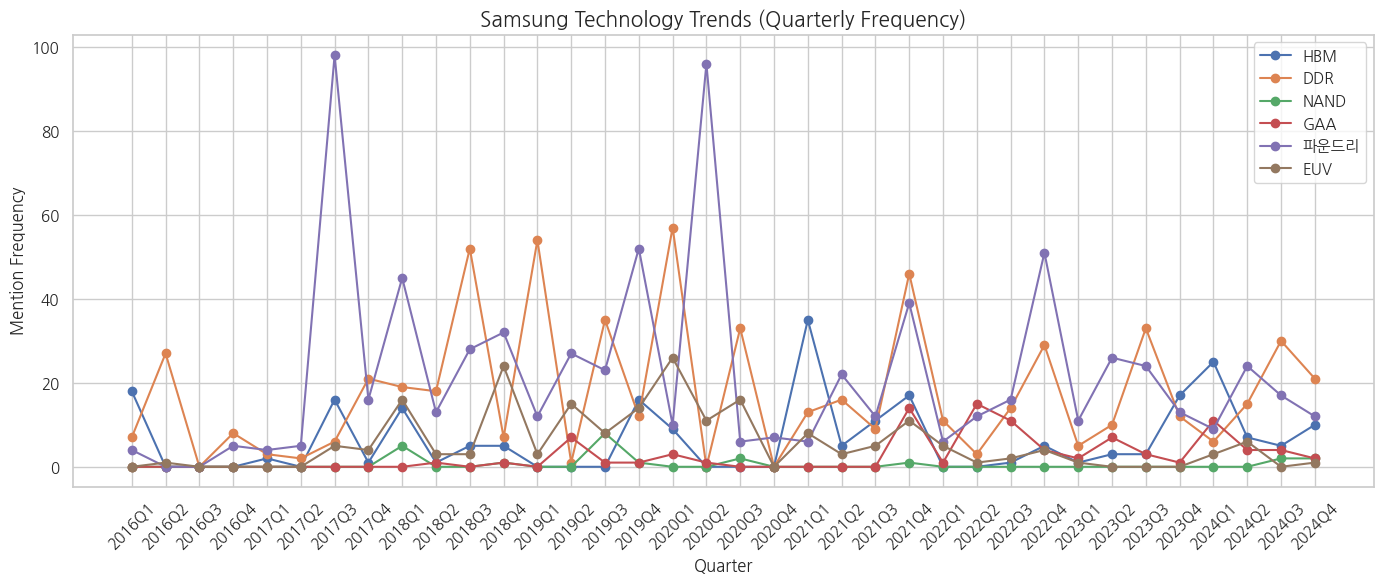

=== SK Hynix Tech Trends ===


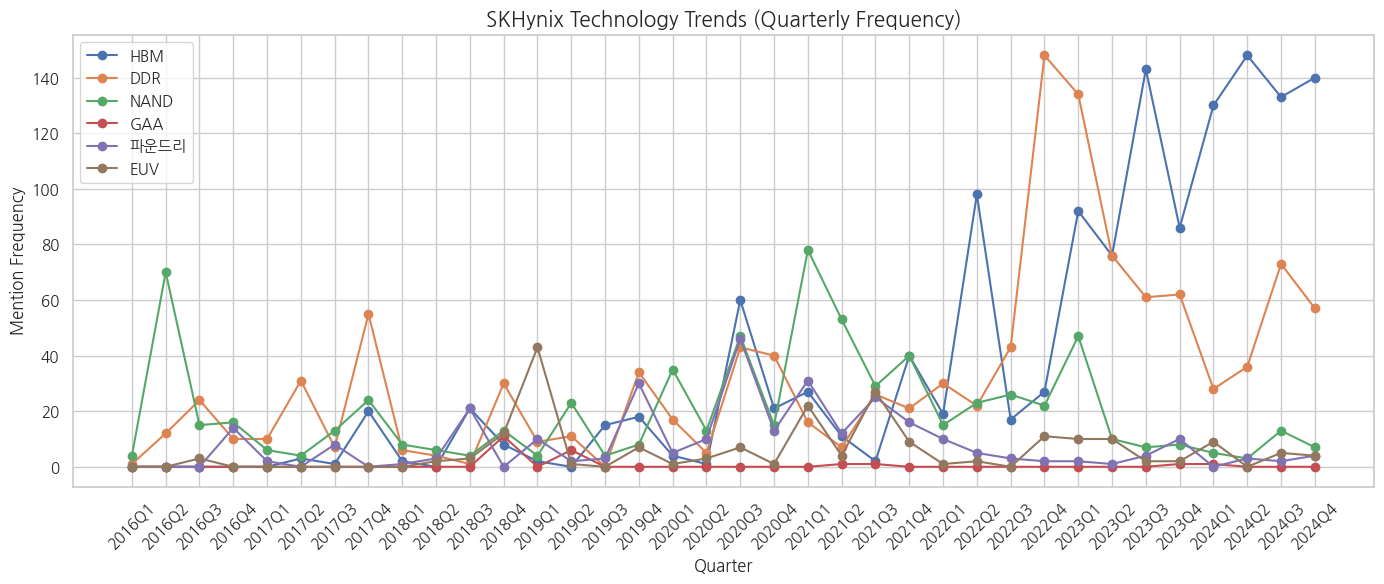

=== 2023 Tech-Social Impact Heatmap ===


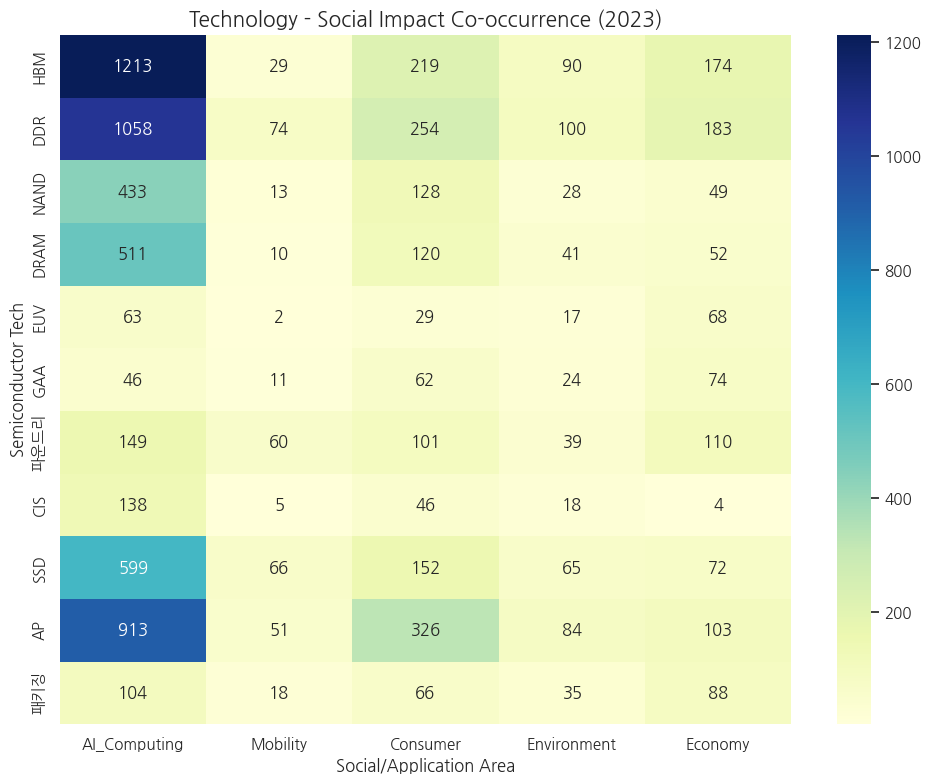

=== 2024 Tech-Social Impact Heatmap ===


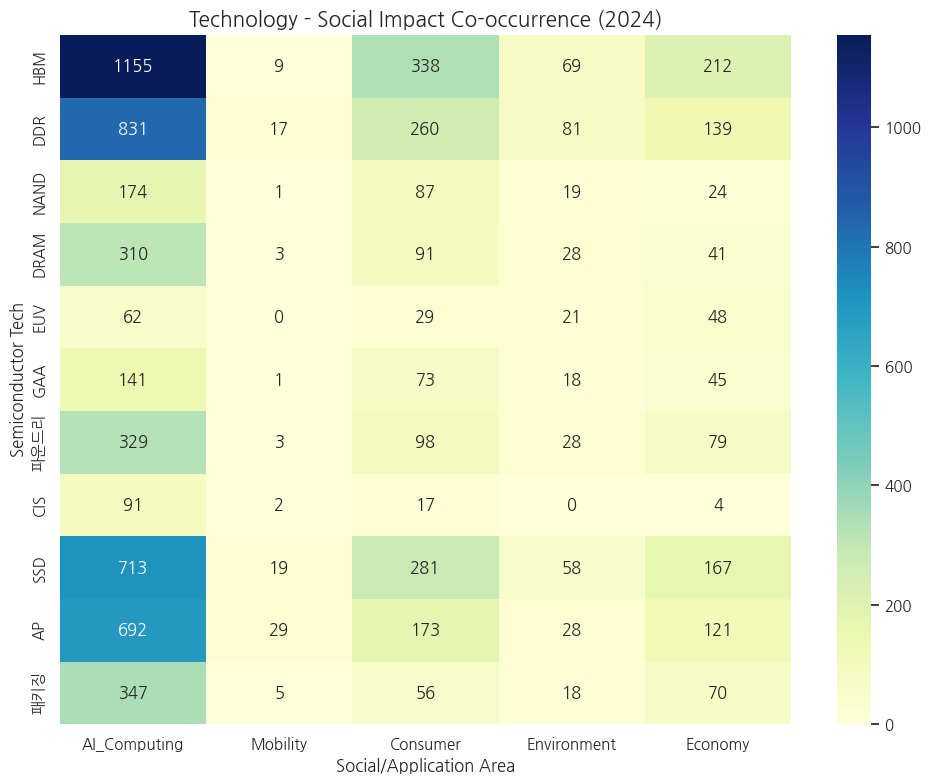

=== Market Sentiment Analysis ===


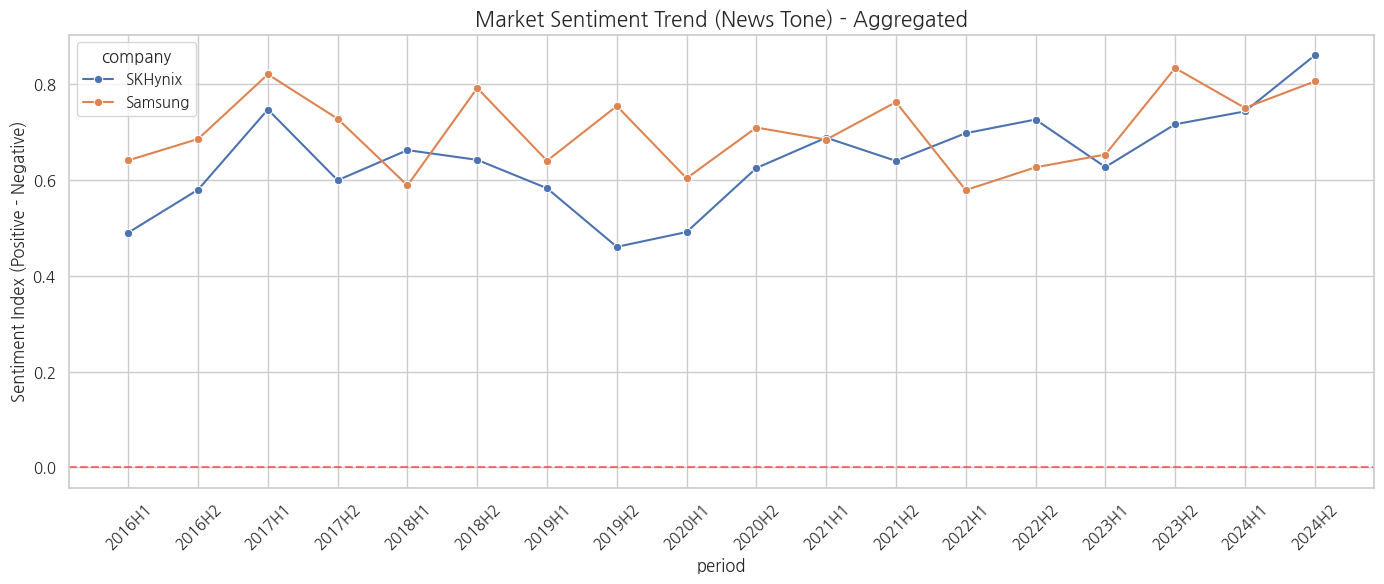

In [6]:
# 6. 실행 및 시각화
print("=== Samsung Tech Trends ===")
plot_tech_trends('Samsung')

print("=== SK Hynix Tech Trends ===")
plot_tech_trends('SKHynix')

print("=== 2023 Tech-Social Impact Heatmap ===")
plot_impact_heatmap(2023)

print("=== 2024 Tech-Social Impact Heatmap ===")
plot_impact_heatmap(2024)

print("=== Market Sentiment Analysis ===")
plot_sentiment()